In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
% precision 2
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm

## Exploratory Analysis & Notebook Building

#### References for Data

    HHI Data - http://www.psc.isr.umich.edu/dis/census/Features/tract2zip/
    Population Density Data - https://blog.splitwise.com/2014/01/06/free-us-population-density-and-unemployment-rate-by-zip-code/

### Data Dictionary

#### Import Data

In [2]:
cd = pd.read_csv('../Final/clv_validation_data_2016-08-26.csv', sep = ';')
hhi = pd.read_csv('../Final/hhi-by-zip.csv', sep = ',')
pden = pd.read_csv('../Final/pop-density-2010.csv', sep = ',')
cud = pd.read_csv('../Final/cud_2016-08-29.csv', sep = ';')
lud = pd.read_csv('../Final/lud_2016-08-29.csv', sep = ';')
fp = pd.read_csv('../Final/mp_clv_2016-08-17.csv', sep = ';')

## Feature Creation
#### Format Zip Codes & Dates

In [3]:
#Formatting Zip Codes
pden['Zip/ZCTA'] = pden['Zip/ZCTA'].astype(str).str.zfill(5)
hhi['Zip'] = hhi['Zip'].astype(str).str.zfill(5)
cd['zip_code5'] = cd['zip_code5'].astype(str).str.zfill(5)
lud['default_shipping_zip'] = lud['default_shipping_zip'].astype(str).str.zfill(5)

# Formatting Dates
cd_dt = ['first_trans_date','checkout_date','cancellation_date','estimated_ship_date']
cud_dt = ['first_trans_date','last_trans_date','sign_up_date']

for i in cd_dt:
    cd[i] = pd.to_datetime(cd[i])

for i in cud_dt:
    cud[i] = pd.to_datetime(cud[i]) 



#### Drop Redundant and Unnecessary Data 

In [4]:
cd = cd.drop(labels = ['shipment_id','warehouse_order_id','product_title'], axis = 1)
lud = lud.drop(labels = ['clv_profit_10_year','custora_churn_risk','is_purchaser','next_scheduled_order',], axis = 1)
hhi.columns = ['Zip','Median-HHI','Mean-HHI','Pop']
hhi = hhi.drop('Pop', axis =1)
pden = pden.drop(['2010 Population','Land-Sq-Mi'],1)


In [5]:
df = pd.merge(left = cd, right = hhi, how = 'left', left_on = 'zip_code5', right_on = 'Zip')
df = pd.merge(left = df, right = pden, how = 'left', left_on = 'zip_code5', right_on = 'Zip/ZCTA')
df = pd.merge(left = df, right = cud, how = 'left', left_on = 'user_id', right_on = 'user_id')
df = pd.merge(left = df, right = lud, how = 'left', left_on = 'user_id', right_on = 'user_id')
df = df.drop(labels = ['Zip/ZCTA','Zip'], axis = 1)


In [6]:
df.describe()

,user_id,program_id,shipped_orders,order_id,quantity,order_revenue,discount_amount,cogs,overhead,clv_profit_1_year_x,...,clv_profit_2_year,clv_profit_3_year,clv_profit_10_year_y,profit_next_1_year,profit_next_2_year,profit_next_3_year,profit_next_10_year,action_by,credit_balance,default_shipping_days_in_transit
count,405133.00,405133.00,405133.00,405133.00,405133.00,405133.00,173018.00,405133.00,400008.00,405004.00,...,405004.00,405004.00,405004.00,405133.00,405133.00,405133.00,405133.00,405133.00,62557.00,401157.00
mean,580410.49,31200774.48,1.84,2987126.99,5.37,86.82,-14.63,-58.37,-18.49,713.28,...,1457.44,2027.12,4243.53,596.54,1065.82,1458.71,3281.06,0.00,8.13,1.94
std,103930.59,201389.27,3.45,583726.85,9.97,71.55,13.29,50.34,8.39,4103.47,...,8535.03,11942.74,25187.45,3579.90,6392.00,8744.12,19636.35,0.00,159.31,0.84
min,326.00,30665814.00,1.00,1479853.00,1.00,0.08,-666.78,-3247.88,-294.24,-1473.52,...,-2474.92,-3644.42,-8188.08,-1034.73,-1889.25,-2624.83,-6181.97,0.00,-14.92,1.00
25%,510718.00,31036109.00,1.00,2509219.00,1.00,46.36,-18.33,-73.12,-20.58,4.75,...,6.34,6.92,8.22,0.06,0.10,0.14,0.33,0.00,0.00,1.00
50%,584602.00,31191722.00,1.00,2905938.00,2.00,68.97,-10.80,-46.56,-15.78,28.97,...,41.24,47.84,66.27,1.95,3.52,4.85,11.09,0.00,0.00,2.00
75%,658651.00,31343499.00,1.00,3387623.00,5.00,107.98,-5.95,-28.80,-13.34,96.00,...,160.24,205.00,377.33,45.33,81.44,111.91,256.21,0.00,0.00,3.00
max,743701.00,31636119.00,100.00,4357557.00,365.00,4746.40,-0.01,-0.50,-3.88,26912.44,...,55962.85,78312.61,165160.38,23473.16,41912.50,57335.92,128760.82,0.00,4687.48,5.00


In [7]:
#Creating this so I have only information I would have after first purchase
nc = df[df.new_customer == 't']
nc.describe()

,user_id,program_id,shipped_orders,order_id,quantity,order_revenue,discount_amount,cogs,overhead,clv_profit_1_year_x,...,clv_profit_2_year,clv_profit_3_year,clv_profit_10_year_y,profit_next_1_year,profit_next_2_year,profit_next_3_year,profit_next_10_year,action_by,credit_balance,default_shipping_days_in_transit
count,167951.00,167951.00,167951.00,167951.00,167951.00,167951.00,84916.00,167951.00,164930.00,167824.00,...,167824.00,167824.00,167824.00,167951.00,167951.00,167951.00,167951.00,167951.00,11593.00,166236.00
mean,583968.44,31077299.53,2.09,2629553.45,4.83,79.55,-14.10,-53.33,-17.59,34.29,...,52.60,66.73,124.87,14.50,26.29,36.38,84.84,0.00,4.33,2.01
std,103588.66,141091.36,4.05,373400.52,8.99,65.95,13.32,47.65,7.72,114.61,...,208.30,280.74,582.30,79.55,143.12,196.93,451.57,0.00,46.02,0.83
min,326.00,30665814.00,1.00,1479853.00,1.00,0.99,-553.89,-1616.88,-294.24,-1473.52,...,-2474.92,-3644.42,-8188.08,-1034.73,-1889.25,-2624.83,-6181.97,0.00,-14.92,1.00
25%,516345.50,30958934.50,1.00,2320212.50,1.00,35.98,-17.39,-67.80,-18.28,1.09,...,1.40,1.56,2.10,0.02,0.03,0.05,0.11,0.00,0.00,1.00
50%,588120.00,31067309.00,1.00,2586982.00,2.00,63.48,-10.30,-42.40,-13.84,9.78,...,10.68,11.18,12.59,0.16,0.29,0.39,0.90,0.00,0.00,2.00
75%,663581.00,31183371.00,1.00,2881227.00,4.00,99.94,-5.95,-22.30,-13.16,33.12,...,40.76,45.21,58.44,1.82,3.29,4.55,10.45,0.00,0.00,3.00
max,743701.00,31358981.00,100.00,3437050.00,290.00,2213.58,-0.10,-0.54,-3.88,26912.44,...,55962.85,78312.61,165160.38,23473.16,41912.50,57335.92,128760.82,0.00,4687.48,5.00


## Exploration Summary

The goal of this project is to find better ways to predict customer lifetime value (CLV) at the earlier point possible in a customer's purchase lifetime. Today, it takes 3-4 months to get an accurate picture of total CLV for non-subscription customers and 6-9 months to have accurate CLV predictions for subscription (Auto-Ship, or AS) customers.

The below analysis show that two core components, purchase frequency and basket composition, are key drivers of CLV. However, much of what determines a customer's actual value is whether or not they repurchase, and that largely depends on the utility of the service for these customers.

In [8]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371843 entries, 0 to 371842
Data columns (total 4 columns):
user_id                 371843 non-null int64
clv_profit_10_year      206311 non-null float64
most_purchased_brand    206664 non-null object
min_active_interval     371843 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 11.3+ MB


In [9]:
fp = fp.dropna(subset = ['user_id','clv_profit_10_year','most_purchased_brand'])

clv_by_int = pd.crosstab(index = fp.most_purchased_brand, columns = fp.min_active_interval, values = fp.clv_profit_10_year, aggfunc = 'mean', margins = True)
dropped = clv_by_int.dropna()


### Purchase Frequency - Shorter Subcription Interval Correlates w/ Higher CLV

The violin plot below shows the shape of CLV's at different intervals. Each number is the number of days at which deliveries are schedules, ranging from 14 days (2 weeks) to 112 days (16 weeks). Non-subscription programs are represented by a 0.

Looking only at non-null intervals, we see two things. First, the median and mean are higher for lower intervals, suggesting that frequency of shipments correlates with higher CLV. Second, the shorter the interval, the wider the variance, meaning that they have much more potential to be great OR bad customers.

This seems to support the hypothesis that understanding frequency is important for predicting CLV.

C:\Users\Justin\Anaconda2\lib\site-packages\seaborn\categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


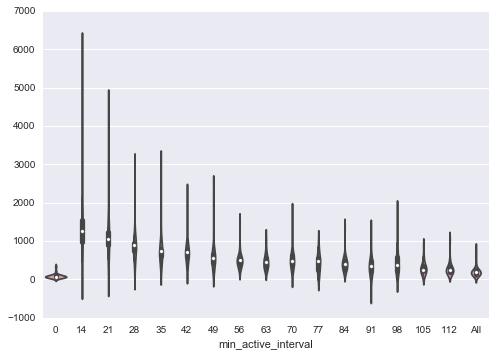

In [10]:
sns.violinplot(dropped)

### CLV Distribution by Brand - Cart Composition Affects CLV

Below is a violin plot of average CLV/customer by Brand. The brand is determined in this case by the most purchased brand in a customer's lifetime, based on the total percentage of revenue that brand comprises in cart. This has historically been one of the better indicators of "good" and "bad" customers, and we can see that there is a significant group of brands that have much higher associated CLV's that the rest.

But there is also very high variance within many other factors also exist within each cart as predictors (such as purchasing multiple categories, overall AOV, and where in the US we're shipping product, as that can turn a typically "good" cart profit.

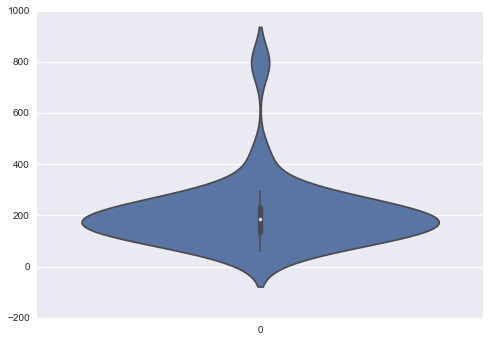

In [11]:
sns.violinplot(data = dropped['All'])

The violin plot below shows the relationship between CLV and estimated time in transit. Each has a relatively similar mean (close to zero), but decreasing variance as time in transit lengthens. This speaks to 3 things.

First, there is an overall trend in profitability based on geography--shorter transit times allow for a broader distribution of CLV values in both positive and negative directions, but the distribution skews positive.

Second, each mean and median is near 0, which means the majority of CLV's are very low, and the burden of profitability lies amongst the positive outliers.

Third, there seems to be lots of noise in this data, and I might need to find a better way to group or identify high-potential customers than a simple regression. I'm not sure how, but the box plot below this especially concerning, given that all significantly positive OR negative customers are technically defined as outliers.

This makes me think that I might need to try to shift to a classification model that identifies tiers of customer potential and identifies customers with potential. This would allow for further marketing efforts to optimize customer value.

Axes(0.125,0.125;0.775x0.775)


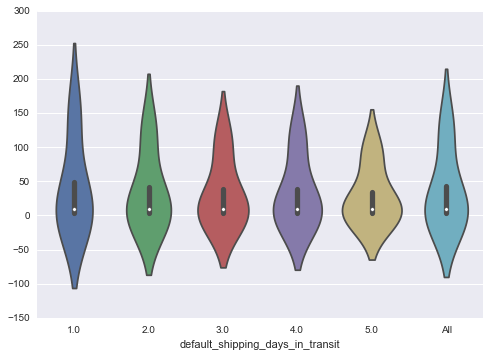

In [12]:
clv_by_dfz = pd.crosstab(index = nc.clv_profit_10_year_y, columns = nc.default_shipping_days_in_transit, values = nc.clv_profit_10_year_y, aggfunc = 'mean', margins = True)
dfz = clv_by_dfz.dropna()
print sns.violinplot(data = dfz);


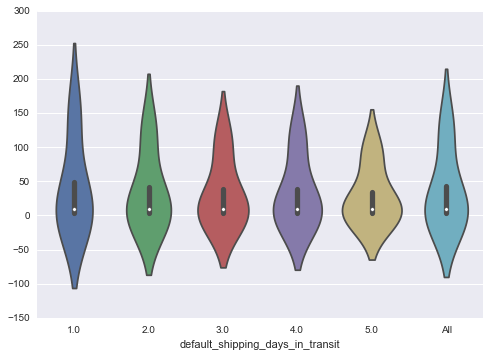

In [13]:
clv_by_dfz = pd.crosstab(index = nc.clv_profit_10_year_y, columns = nc.default_shipping_days_in_transit, values = nc.clv_profit_10_year_y, aggfunc = 'mean', margins = True)
dfz = clv_by_dfz.dropna()
sns.violinplot(data = dfz)

Axes(0.125,0.125;0.775x0.775)


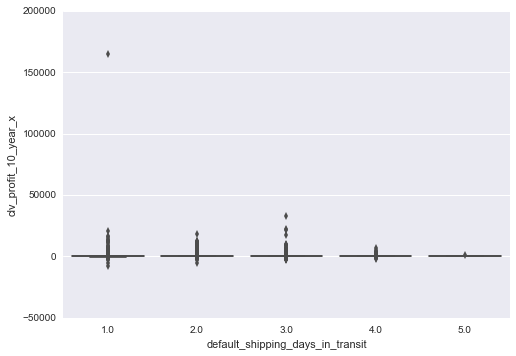

In [14]:
print sns.boxplot(x=nc.default_shipping_days_in_transit, y=nc.clv_profit_10_year_x, data = nc);